# Introduction
In this notebook we will cover the following topics:
- Trees, such as decision trees.
- Naïve bayes

# Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. A decision tree can learn to predict the target value by learning rules. Those rules are based on the given features. For instance, if you want to determine if someone has a sever risk of getting diabetes you could do the following: `if blood glucose level is high then YES, else NO`. The tree divides the features into smaller nodes.

**Advantages**:
- Simple to understand and to interpret. The tree can be visualized.
- Doesn't require much data preparation, regarding normalization, dummy variables etc.
- The cost of using the tree is logarithmic in the number of datapoints, thus it is rather quick.
- Possible to validate a model using tests.

**Disadvantages**:
- Can create over-complex trees that do not generalize data well. Thus, overfitting is a big issue with trees, especially with high-dimensional data.
- Can be unstable, because small variations in data might result in completely different trees. That is why an `ensemble` is popular.
- Decision trees create biased trees if some classes dominate. Therefore, class-balancing is very important. This can be done using over- under-sampling and other techniques.

For classification, scikit-learn provides the `DecisionTreeClassifier`. This model can be used for:
- Binary classification
- Multi-class classification

The model can output:
- The actual prediction
- The probability of a prediction. There have been some issues whether it would really be the probability. Therefore, some calibration methods have been developed. However, this is too in-depth, but good to know that probability can be misleading.

To plot the decision tree function we can use the `plot_tree` function. This will give us insight into its decision rules. For an extensive tutorial, read the <a href="https://scikit-learn.org/stable/modules/tree.html#tree" target="_blank">user guide</a>.

For regression, scikit-learn provides the `DecisionTreeRegressor`.

**Tips on practical use**:
- As decision trees tend to overfit with a large number of features, make sure to getting the right ratio of samples to features.
- Consider performing dimensionality reduction.
- Consider creating another model that doesn't overfit for feature selection purposes.
- Tune `max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease`.

# Naive bayes
Naive bayes are methods based on Bayes' theorem with the assumption of conditional independence between every pair of features given the value of a class variable.

Advantages:
- Tends to work really well in real-world situations.
- Can be very fast.
- Requires a small amount of training data.
- If the dataset does not fit into memory, some types can use the `partial_fit` method.

Disadvantages:
- Although it is a decent classifier, it is known as a bad estimator. Therefore the probabilities from `predict_proba` are not used normally.

Types of classifiers offered by scikit-learn:
- `GaussianNB` uses the Gaussian Naive Bayes algorithm for classification. It assumes that the likelihood of the features is Gaussian.
- `MultinomialNB` is used for multinomially distributed data.
- `ComplementNB` implements the complement naive Bayes algorithm. It is an adaptation of the mulltinomial naive bayes and is suitable for imbalanced data sets.
- `BernoulliNB` assumes that data is distributed according to multivariate Bernoulli distributions. Thus, it requires binary-valued variables.
- `CategoricalNB` implements naive Bayes for categorically distributed data. It assumes that each feature has its own categorical distribution.

For an extensive description, make sure to read the <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>.

**Main takeaway**:
- Every dataset has its own characteristic and different types of models have their own unique aspects that may work best with a given dataset.

# Example of understanding decision trees

In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

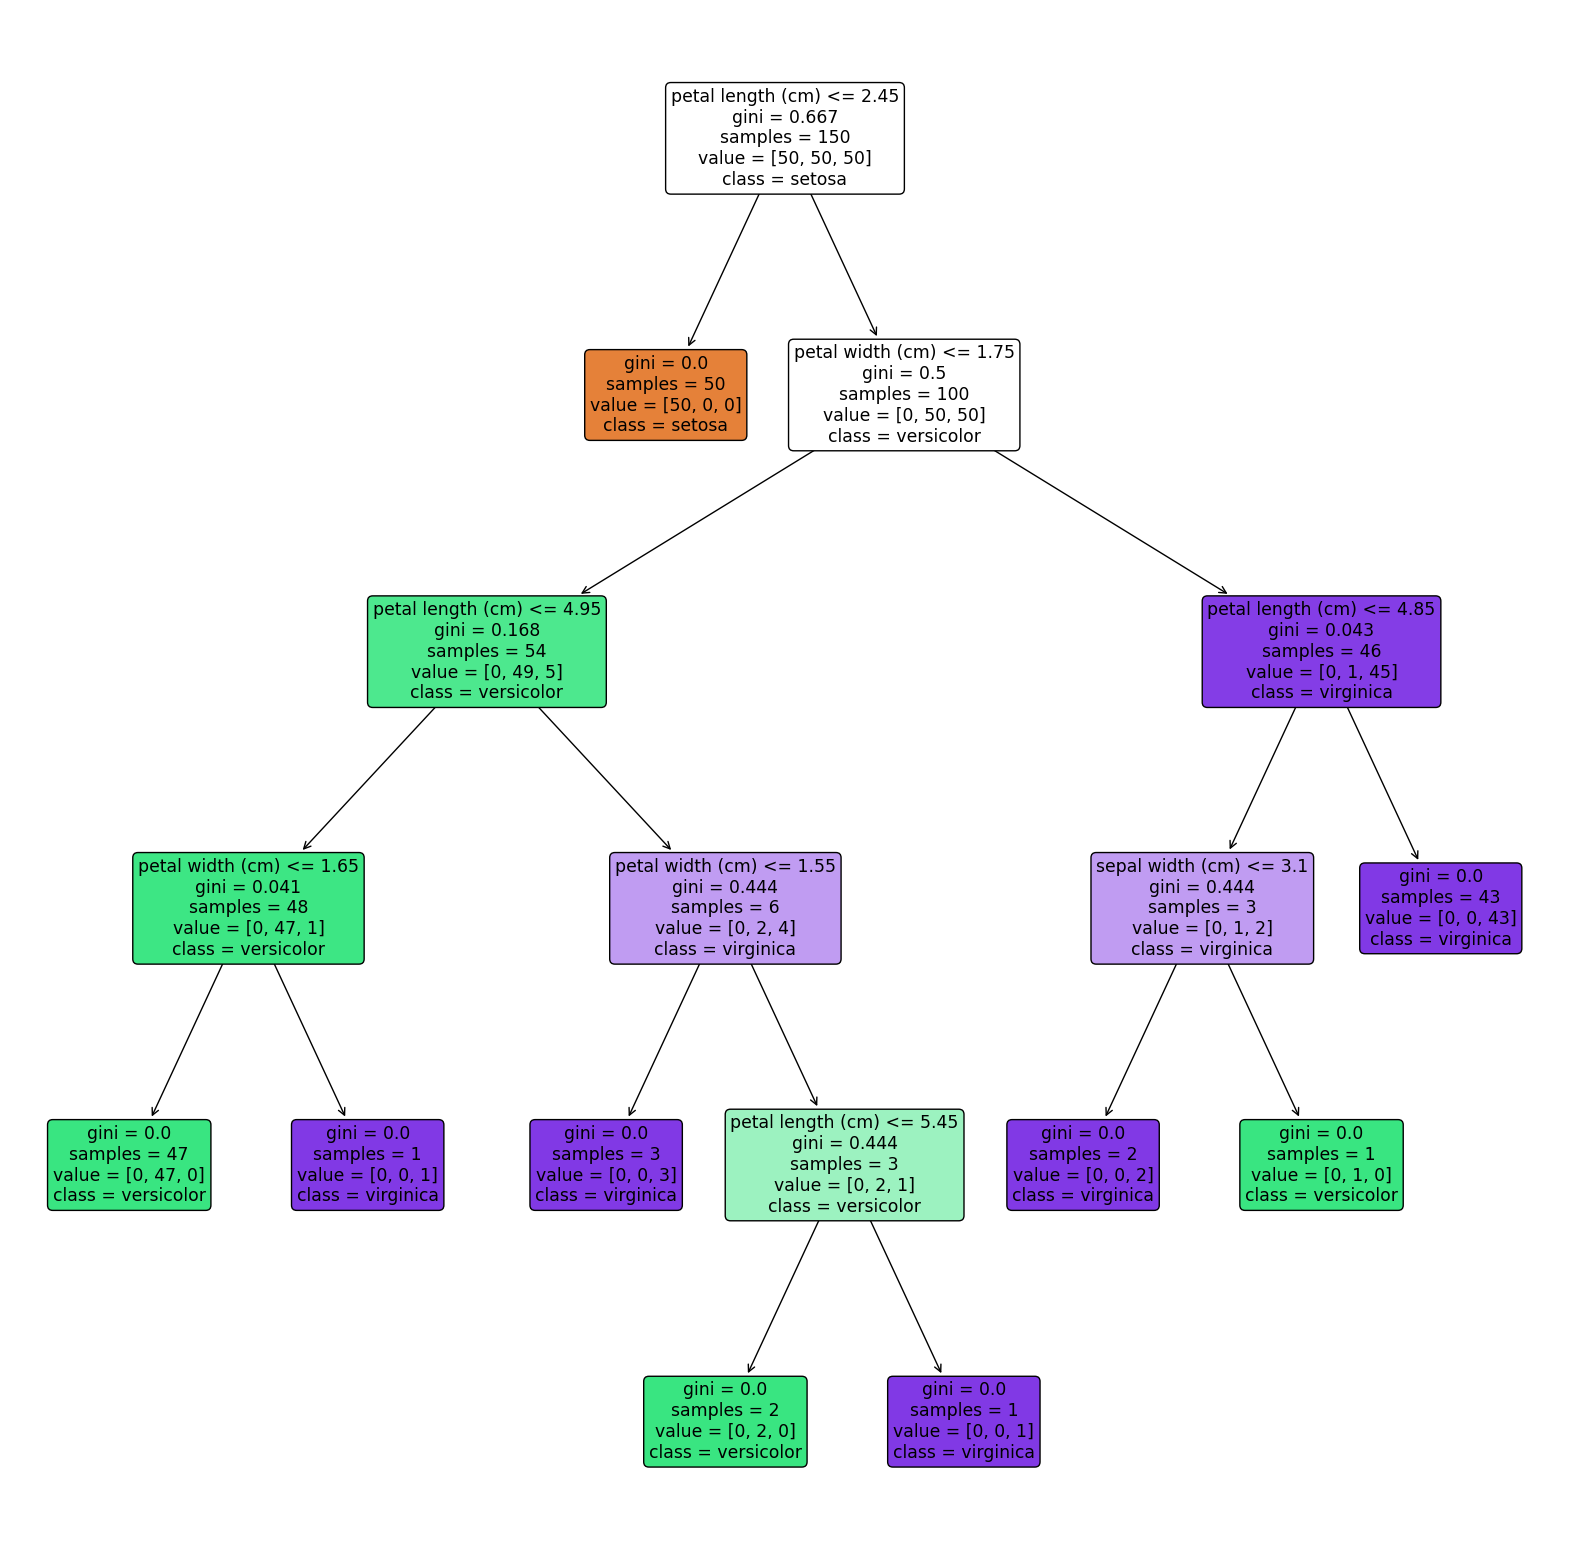

In [3]:
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

We can see that if the petal width is smaller than 1.75 it will look if the class has a petal length smaller than 4.95 or smaller than 4.85. It will then create new nodes and determine to which class the features belong. 

# Comparing decisions

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 

from matplotlib.colors import ListedColormap

In [5]:
datasets = [make_moons(), make_circles()]
names = ['Decision Tree', 'Naive Bayes']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB()]

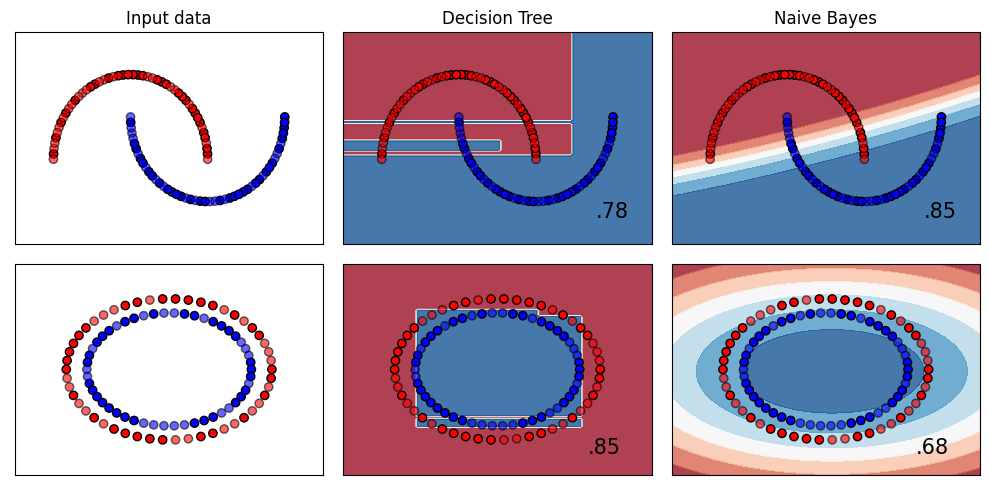

In [6]:
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()

**Conclusion**:
- Classifiers can have unique assumptions that are great for certain datasets and less great for others.